##### By
### Bernardo Vimpi


####  PREDICTIVE ANALYTICS USING LINEAR GRESSION

#### PROJECT DESCRIPTION AND OBJECTIVES

In this project, we'll include a dummy variable to add categorical data into the regression model. In the previous project, we used only numerical data such as SAT and GPA. Now, we also include variable such as "Attendance" into the regression model. For example, another important variable to consider when analyzing the relationship between SAT and GPA scores is "Attendance". The expectation is that a student who attends his or her classes has a higher propensity to have a better or higher score than one who does not attend classes. Therefore, in the dataset, the variable "Attendance" is categorical assuming the values of "Yes" and "No". We cannot simply add them in to the regression model as given. In this case, we use a dummy variable. we eventually use the regression model to predict the GPA score of students based on their SAT and "Attendance" and we make final remarks regarding our analysis.

### DATA 

The original data can be found in Kaggle.com. A direct link to the data is https://www.kaggle.com/luddarell/103-dummiescsv. The entire dataset is then extracted from the Kaggle and imported in our notbook for further analysis. 

### Let's import all needed libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Lets import the data via CSV file

In [2]:
raw_data = pd.read_csv("C:\\Users\\bev\\1.03. Dummies.csv")

## Exploratory Data Analysis

In [3]:
raw_data.shape

(84, 3)

Our dataset has 3 columns/variables and 84 observations

In [4]:
raw_data.columns

Index(['SAT', 'GPA', 'Attendance'], dtype='object')

In [5]:
raw_data.head(6)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No


In [6]:
raw_data.tail(6)

,SAT,GPA,Attendance
78,1843,3.71,Yes
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes
83,2050,3.81,Yes


As we can see from the raw_data, there is an additional variable: "Attendance" which indicates the students that attended their classes more than 75% of the time.

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [8]:
raw_data.columns

Index(['SAT', 'GPA', 'Attendance'], dtype='object')

### Statistical Summary

In [9]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Checking for Missing Values

In [10]:
raw_data.isnull()

,SAT,GPA,Attendance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
79,False,False,False
80,False,False,False
81,False,False,False
82,False,False,False


In [11]:
raw_data.notnull()

,SAT,GPA,Attendance
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
79,True,True,True
80,True,True,True
81,True,True,True
82,True,True,True


So far we have not found any missing values in our data set. We can expand our missing value analysis via Seaborn visualization

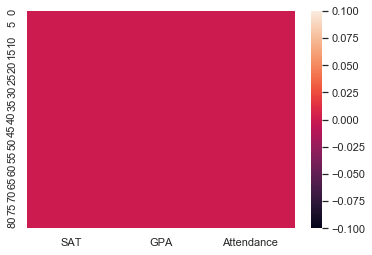

In [12]:
sns.heatmap(raw_data.isnull(),cbar=True)

Our analysis is consistent and we can conclude that our data does not have any missing values. 

### MAPPING THE DATA

In this case, I mapp the "Attendance" variable with the values of "1" and "0" replacing, therefore, the "Yes" and "No". This means that if a given student attendance is >=75% I assign the value of "1" and anything bellow that I assign the value of "0".  

In [13]:
data=raw_data.copy()

In [14]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No' : 0})

In [15]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


We now have a new data frame in which the "Attendance" variable gets the dummy variables of 1 if they attended and 0 is they did not

### DESCRIPTIVE STATISTICS OF THE DATA

In [16]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


### INTERPRETATION OF RESULTS
    
The descriptive statistics suggests that the mean for attendance is 0.462486. The fact that the mean is less than 0.5 it is an indicative that there are more 0s than 1s. Since the outcome is 0s and 1s, this imply that 46% of the students have attended more than 75% of their classes.

### Data Visualization

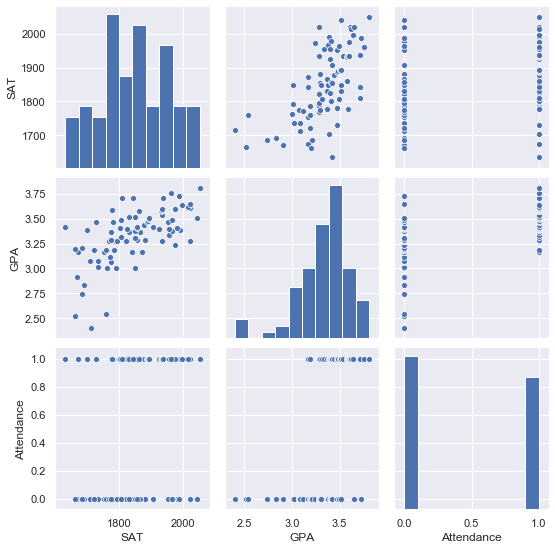

In [17]:
sns.pairplot(data)

## REGRESSION MODEL 
##### Our Regression model includes the GPA, SAT and Attendance features. 

In [18]:
y= data['GPA']
x1= data[['SAT', 'Attendance']]

#### USING THE STATSMODEL METHOD TO ADD A CONSTANT and FIT THE REGRESSION TO GET THE SUMMARY

In [19]:
x= sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.19e-15
Time:                        19:24:31   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RESULTS EXPLANATION AND INTERPRETATION

Overall the model is significant (looking at the F-Statistics and Prob(F-Statistic) scores). The SAT score is significant so is the dummy. The adjusted R-Squared of the model is = 0.555 which is an improvment from the previously tested model where the Adj.R-Squared was 0.399. The previous model ( GPA = 0.275 + 0.0017 * SAT) did not take into considerantion the "Attendance" variable. The new model, which includes the dummy variable, is GPA = 0.6439 +0.0014 * SAT + 0.2226 * Dummy. Since the Dummy variable is represented by the values of "1" and "0" we can also represent the equation GPA = 0.6439 +0.0014 * SAT + 0.2226 * 0 or GPA = 0.6439 +0.0014 * SAT for those with attendance below 75%. On the other hand, the model becomes GPA = 0.6439 +0.0014 * SAT + 0.2226 * 1  or GPA = 0.8665 +0.0014 * SAT for students who had attandance greater than or equal to 75%.  

#### LETS PLOT THE TWO EQUATIONS: GPA = 0.6439 +0.0014 * SAT and GPA = 0.8665 +0.0014 * SAT

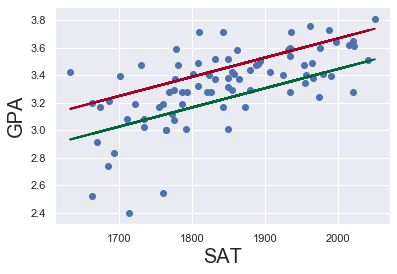

In [20]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes= 0.8665 + 0.0014*data['SAT']
fig=plt.plot(data['SAT'], yhat_no, lw=2, c='#006837')
fig=plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize= 20)
plt.show()

### RESULTS EXPLANATION & INTERPRETATION

The regression line colored in "Red" represents GPA = 0.8665 +0.0014 * SAT while the line colored in "Green" represents GPA = 0.6439 +0.0014 * SAT. 

Both equantions have the same slope but they have different intercept. The students who attended are spread around the upper red line. On average, their GPA is 0.2226 higher than the students who did not attend. We can also improve the model to represent the students who attended in "red" lines while those who did not attend in "green lines" as shown below. 


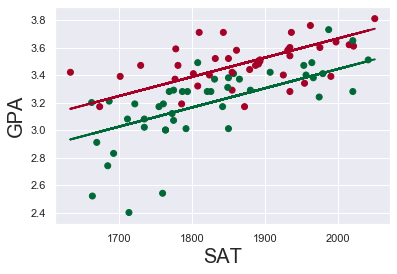

In [21]:
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap ='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes= 0.8665 + 0.0014*data['SAT']
fig=plt.plot(data['SAT'], yhat_no, lw=2, c='#006837')
fig=plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize= 20)
plt.show()

#### ADDING THE ORIGINAL REGRESSION LINE ON THE GRAPTH

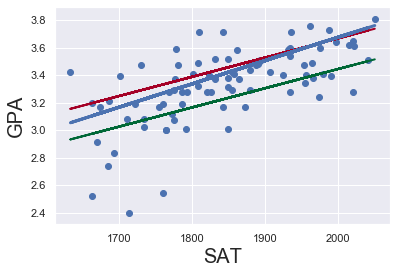

In [22]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes= 0.8665 + 0.0014*data['SAT']
yhat=0.0017*data['SAT'] + 0.275# THe original regression line is represented by the equation
fig=plt.plot(data['SAT'], yhat_no, lw=2, c='#006837', label = 'regression line1')
fig=plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label = 'regression line2')
fig=plt.plot(data['SAT'], yhat, lw=3, c='#4C72B0', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize= 20)
plt.show()

Ploting the original regression line (in "blue" color) on the grapth, we see that it is steeper and it is placed some where between the regression lines of the dummies

### PREDICTIVE ANALYSTICS: Using the Regression Model

To use this model for predictive purposes, we need two important variables of information: SAT core and if a student attended 75% or more of his or her classes.
There is a StatsModels method which takes a data frame oganized in the same way as X and then makes predictions as needed. For the regression we worked with the variable X.

### EXPLORATORY ANALYSIS OF DATA FRAME'X'.

In [23]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


"X" is a data frame which contains 3 columns: Constant, SAT and Attendance.  The constant was added when we used the x= sm.add_contant(x1) prior to fitting the model. This is a simulation of x0s and contains only 1s. 

### CREATE A DATA FRAME FOR PREDICTIVE ANALYTICS

The Data Frame used for prediction will be organized in the same way as X: Constant, SAT and Attendance. In this example, we'll analyze the results of two students:

Bernardo, who got 1700 on the SAT and did NOT attend 75% of the lectures
Maria, who got 1670 on the SAT and attended 75% or more of the lectures.

In [24]:
new_data=pd.DataFrame({'const' :1,'SAT' :[1700,1670], 'Attendance' :[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


##### Changing the index  to "Bernardo" and "Jeniffer"

In [25]:
new_data.rename(index={0:'Bernardo', 1: 'Maria'})

,const,SAT,Attendance
Bernardo,1,1700,0
Maria,1,1670,1


### METHOD TO PREDICT THE VALUE

In [26]:
predictions= results.predict(new_data)# the fittent regression is in the variable 'results', which is results=sm.OLS(y,x).fit()
predictions

0    3.023513
1    3.204163
dtype: float64

The results contains the two predictions. We'll transform the results into a data frame and join it with the first one.

#### DATA TRANSFORMATION:  PREDICTIONS INTO DATA FRAME

In [27]:
predictionsdf=pd.DataFrame({'Predictions' :predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0: 'Bernardo',1:'Maria'})

,const,SAT,Attendance,Predictions
Bernardo,1,1700,0,3.023513
Maria,1,1670,1,3.204163


### RESULTS & CONCLUSION

The prediced GPA for Bernardo is 3.02 while for Maria is 3.2. Maria scored lower on her SAT but she attended 75% or more of the classes and she is expected to graduate with a GPA significantly higher than Bernardo. That makes sense. Nevertheless, let us evaluate why we needed the dummies. 

If we used our previous model without the Dummy variable (GPA= 0.275 + 0.0017 * SAT) we would have predicted that Bernardo would have graduated with a GPA of 3.17 and Maria with 3.12. This would have be misleading. Therefore, it makes a lot of more sense why we needed the dummy variable to predict the GPA based on SAT scores factoring in "Attendance". 

Also, our study could be improved by expanding the number of observations and also the number of variables as such Male or Female, year at school and other features that would expand our analysis for a multiple linear regression. Perhaps that would also compell us to get a different data set given that the one used here is confined to those three variables.

## References

Kaggle for data source: https://www.kaggle.com/luddarell/103-dummiescsv

Linear Regression Analysis: http://onlinestatbook.com/2/regression/intro.html 

Pyhthon Documentation Guide: https://www.python.org/doc/av/

##### Thank you
##### Bernardo Vimpi  
